# CSC 380 Final Project
## Comparative Analysis of Crime Rates in Phoenix and Tucson Using Data Science and Machine Learning

* Dwij Ravikumar
* Christopher Le

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

## Data Preprocessing

In [2]:
# Load datasets
phoenix_data = pd.read_csv('crime-data_crime-data_crimestat.csv')
tucson_data = pd.read_csv('Tucson_Police_Reported_Crimes.csv')

# Preliminary data inspection
print("\nInitial look at Phoenix data:")
phoenix_data.iloc[:]

/var/folders/v2/nqh_k3ys619clzd2j5b4z9680000gn/T/ipykernel_11573/3992110578.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  phoenix_data = pd.read_csv('crime-data_crime-data_crimestat.csv')



Initial look at Phoenix data:


INC NUMBER        OCCURRED ON        OCCURRED TO  \
0       201500002101405  11/01/2015  00:00  11/01/2015  05:00   
1       201600000052855  11/01/2015  00:00  01/09/2016  00:00   
2       201500002102327  11/01/2015  00:00  11/01/2015  09:00   
3       201500002102668  11/01/2015  00:00  11/01/2015  11:50   
4       201600000527709  11/01/2015  00:00  03/22/2016  00:36   
...                 ...                ...                ...   
537844     202480002572  04/21/2024  23:00                NaN   
537845  202400000589136  04/21/2024  23:18                NaN   
537846  202400000584786  04/21/2024  23:30  04/21/2024  23:43   
537847  202400000584789  04/21/2024  23:40  04/21/2024  23:44   
537848  202400000584805  04/21/2024  23:45  04/21/2024  23:45   

         UCR CRIME CATEGORY                   100 BLOCK ADDR      ZIP  \
0       MOTOR VEHICLE THEFT              102XX W MEDLOCK AVE  85307.0   
1       MOTOR VEHICLE THEFT         N 43RD AVE & W CACTUS RD  85029.0   
2             LARCENY-THEFT                   51XX N 15TH ST  85014.0   
3       MOTOR VEHICLE THEFT                   69XX W WOOD ST  85043.0   
4             LARCENY-THEFT              33XX W CAMELBACK RD  85017.0   
...                     ...                              ...      ...   
537844        LARCENY-THEFT           34XX E SKY HARBOR BLVD  85034.0   
537845  MOTOR VEHICLE THEFT                  60XX W EARLL DR  85033.0   
537846   AGGRAVATED ASSAULT  N 19TH AVE & W INDIAN SCHOOL RD  85015.0   
537847   AGGRAVATED ASSAULT               16XX E MCKINLEY ST  85006.0   
537848   AGGRAVATED ASSAULT                27XX W BUCKEYE RD  85009.0   

                 PREMISE TYPE  GRID  
0         SINGLE FAMILY HOUSE  BJ04  
1         SINGLE FAMILY HOUSE  DA19  
2                   APARTMENT  BJ30  
3         SINGLE FAMILY HOUSE  AF12  
4                 PARKING LOT  BJ21  
...                       ...   ...  
537844                AIRPORT  AI35  
537845    SINGLE FAMILY HOUSE  BF14  
537846                VEHICLE  BG24  
537847              APARTMENT  BB31  
537848  GAS / SERVICE STATION  AJ22  

[537849 rows x 8 columns]

In [3]:
print("\nInitial look at Tucson data:")
tucson_data.iloc[:]


Initial look at Tucson data:


IncidentID            DateOccurred  Year     Month  Day TimeOccur  \
0       1210180043  2019/02/12 00:00:00+00  2019  February  Tue      0302   
1       1801010290  2018/01/01 00:00:00+00  2018   January  Mon      1053   
2       1705280069  2020/07/09 00:00:00+00  2020      July  Thu      0136   
3       1801010377  2018/01/01 00:00:00+00  2018   January  Mon      1422   
4       1801010241  2018/01/01 00:00:00+00  2018   January  Mon      0930   
...            ...                     ...   ...       ...  ...       ...   
169344  2401230155  2023/01/20 00:00:00+00  2023   January  Fri     15:00   
169345  2401238502  2023/11/22 00:00:00+00  2023  November  Wed     21:07   
169346  2401270068  2023/11/01 00:00:00+00  2023  November  Wed     08:00   
169347  3042615269  2023/04/25 00:00:00+00  2023     April  Tue     18:45   
169348  9009240162  2022/03/01 00:00:00+00  2022     March  Tue      1332   

       Division  Ward  UCR       UCRDescription  Offense  \
0         South   5.0    1        01 - HOMICIDE      101   
1          West   1.0    7             07 - GTA      701   
2         South   5.0    1        01 - HOMICIDE      101   
3         South   5.0    6         06 - LARCENY      604   
4       Midtown   6.0    6         06 - LARCENY      603   
...         ...   ...  ...                  ...      ...   
169344    South   5.0    6         06 - LARCENY      604   
169345  Midtown   6.0    6         06 - LARCENY      603   
169346     West   3.0    6         06 - LARCENY      608   
169347  Midtown   NaN    6         06 - LARCENY      603   
169348     West   6.0    2  02 - SEXUAL ASSAULT      203   

                                       OffenseDescription        CallSource  \
0                              Criminal Homicide - Murder               NaN   
1       Motor Vehicle Theft - Stolen and/or Recovered ...  Call For Service   
2                              Criminal Homicide - Murder  Call For Service   
3                Larceny - From Motor Vehicle (Except 05)  Call For Service   
4                                   Larceny - Shoplifting  Call For Service   
...                                                   ...               ...   
169344           Larceny - From Motor Vehicle (Except 05)  Call For Service   
169345                              Larceny - Shoplifting      Web Reported   
169346        Larceny - From Buildings Open to the Public  Call For Service   
169347                              Larceny - Shoplifting               NaN   
169348        Sexual Assault - Attempted Rape Female/Male               NaN   

        ESRI_OID  
0              1  
1              2  
2              3  
3              4  
4              5  
...          ...  
169344    171105  
169345    171108  
169346    171138  
169347    171158  
169348    171159  

[169349 rows x 14 columns]

## Data Cleaning


In [4]:
# Check for missing values and handle them if necessary
print("\nMissing Values in Phoenix Data:\n")
print(phoenix_data.isnull().sum())
print("\nMissing Values in Tucson Data:\n")
print(tucson_data.isnull().sum())
phoenix_data = phoenix_data.dropna()
tucson_data = tucson_data.dropna()

# Data Cleaning
# Dropping rows with missing values in relevant columns
tucson_data.dropna(subset=['OffenseDescription'], inplace=True)
phoenix_data.dropna(subset=['UCR CRIME CATEGORY'], inplace=True)

# Ensuring consistent formatting (if necessary)
# Convert date columns to datetime objects, standardize text entries, etc.
tucson_data['DateOccurred'] = pd.to_datetime(tucson_data['DateOccurred'])
phoenix_data['OCCURRED ON'] = pd.to_datetime(phoenix_data['OCCURRED ON'])

# Display the columns and data types of each dataset
print("\nTucson Data Info:")
print(tucson_data.info())
print("\nPhoenix City Data Info:")
print(phoenix_data.info())


print(tucson_data.describe())
print(phoenix_data.describe())



Missing Values in Phoenix Data:

INC NUMBER                 0
OCCURRED ON              419
OCCURRED TO           192178
UCR CRIME CATEGORY         0
100 BLOCK ADDR             0
ZIP                        7
PREMISE TYPE            3578
GRID                    1462
dtype: int64

Missing Values in Tucson Data:

IncidentID               0
DateOccurred             0
Year                     0
Month                    0
Day                      0
TimeOccur                0
Division              1731
Ward                  3574
UCR                      0
UCRDescription           0
Offense                  0
OffenseDescription       0
CallSource            2044
ESRI_OID                 0
dtype: int64

Tucson Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 163829 entries, 1 to 169346
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   IncidentID          163829 non-null  int64 

## Exploratory Data Analysis(EDA)

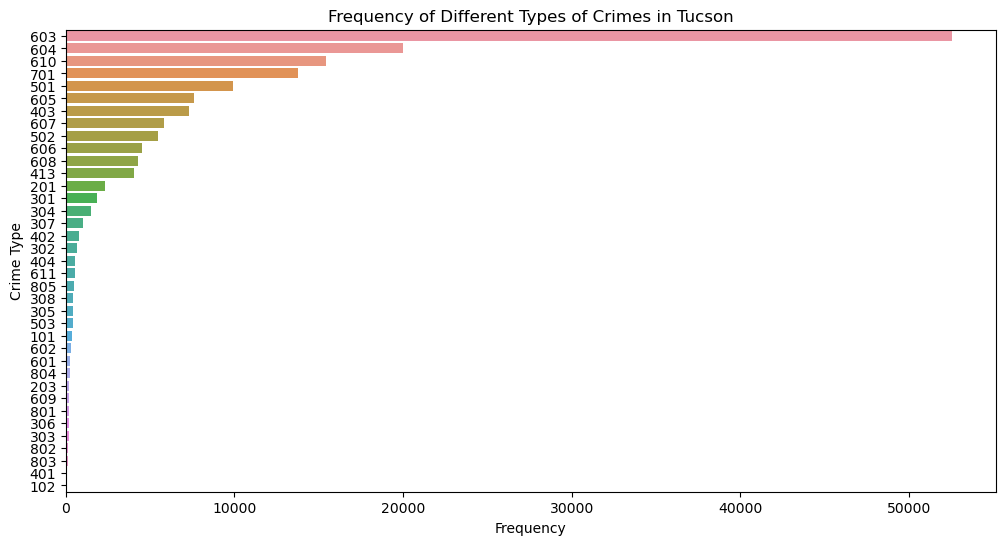

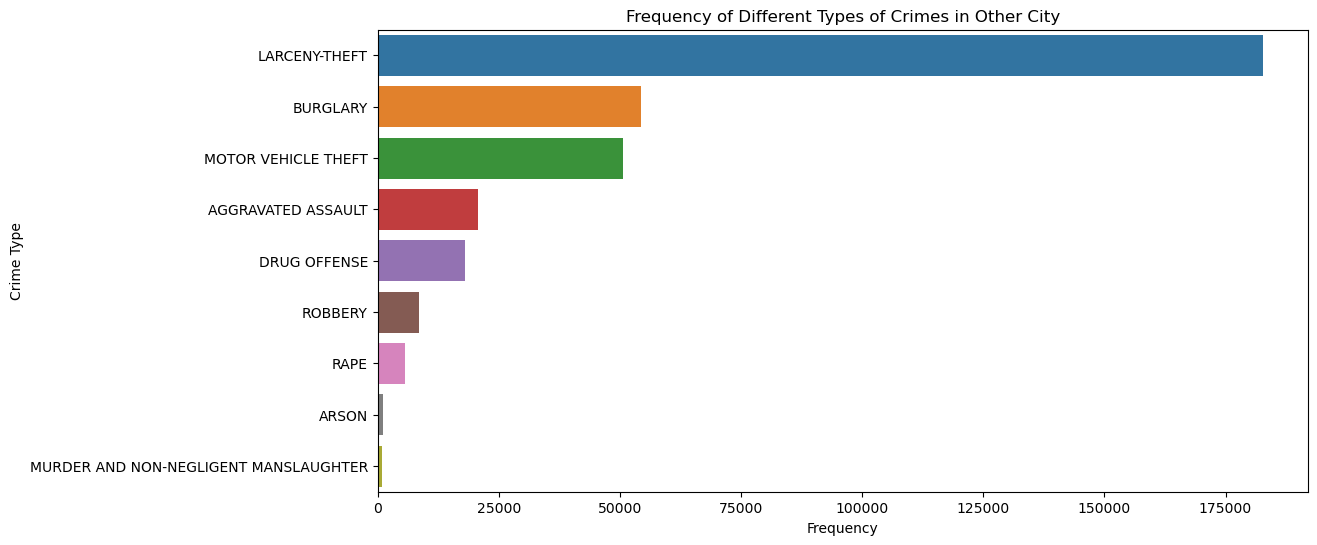

/var/folders/v2/nqh_k3ys619clzd2j5b4z9680000gn/T/ipykernel_11573/1380024605.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tucson_data['Month'] = tucson_data['DateOccurred'].dt.to_period('M')


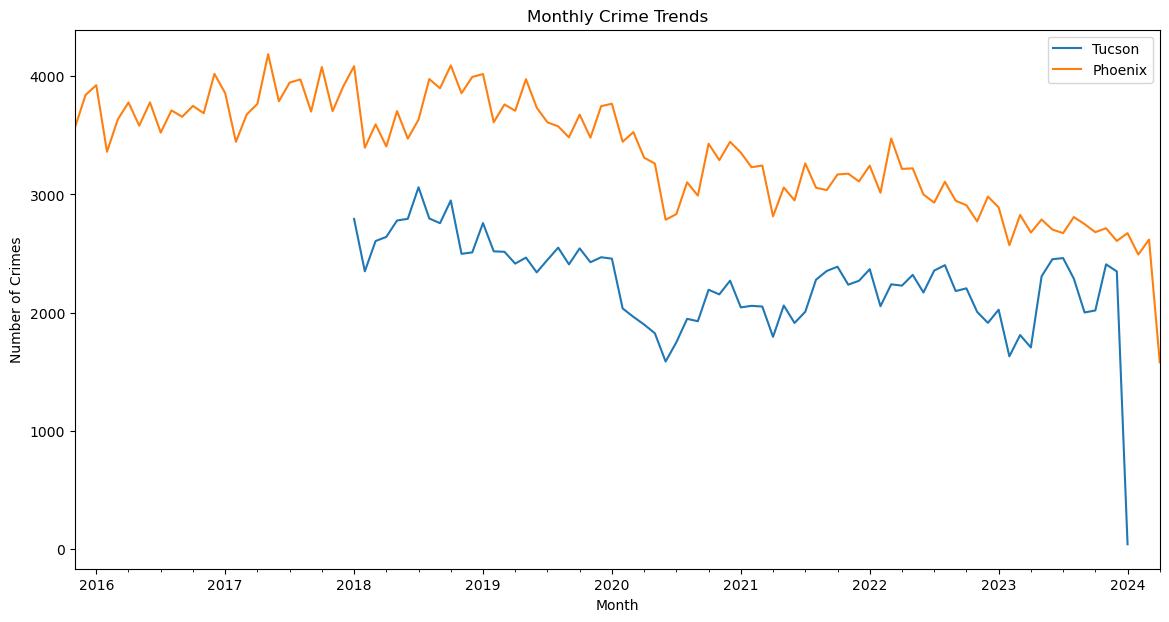

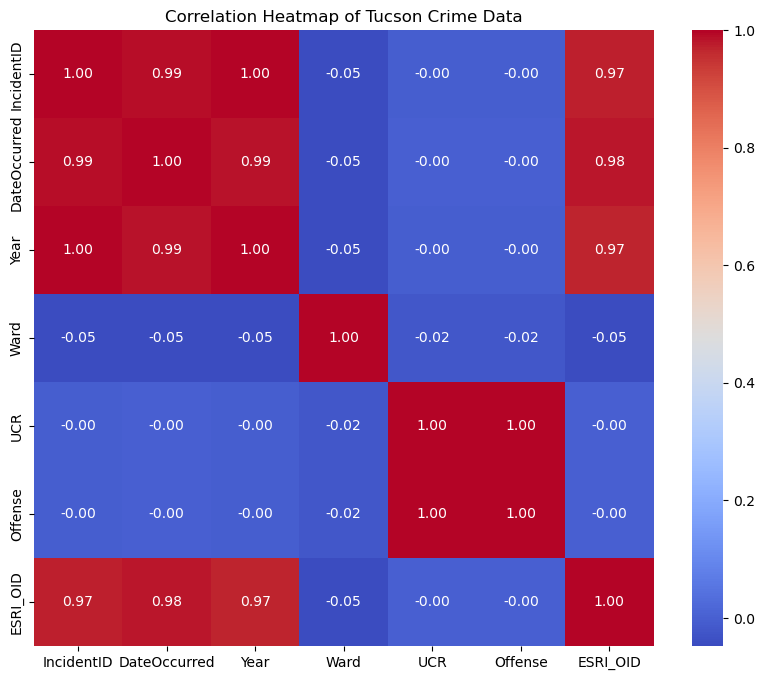

In [5]:
tucson_data['DateOccurred'] = pd.to_datetime(tucson_data['DateOccurred'])
phoenix_data['OCCURRED ON'] = pd.to_datetime(phoenix_data['OCCURRED ON'])

# 1. Crime Frequency by Type
plt.figure(figsize=(12, 6))
sns.countplot(y='Offense', data=tucson_data, order=tucson_data['Offense'].value_counts().index)
plt.title('Frequency of Different Types of Crimes in Tucson')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='UCR CRIME CATEGORY', data=phoenix_data, order=phoenix_data['UCR CRIME CATEGORY'].value_counts().index)
plt.title('Frequency of Different Types of Crimes in Other City')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()

# 2. Temporal Trends (Monthly)
tucson_data['Month'] = tucson_data['DateOccurred'].dt.to_period('M')
phoenix_data['Month'] = phoenix_data['OCCURRED ON'].dt.to_period('M')

tucson_monthly = tucson_data.groupby('Month').size()
other_city_monthly = phoenix_data.groupby('Month').size()

plt.figure(figsize=(14, 7))
tucson_monthly.plot(label='Tucson')
other_city_monthly.plot(label='Phoenix')
plt.title('Monthly Crime Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

# Exclude non-numeric columns (including Periods) for correlation analysis
numeric_data = tucson_data.select_dtypes(exclude=['object', 'period[D]', 'period[M]', 'period[Y]'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Tucson Crime Data')
plt.show()

## Visualization and Comparative Analysis

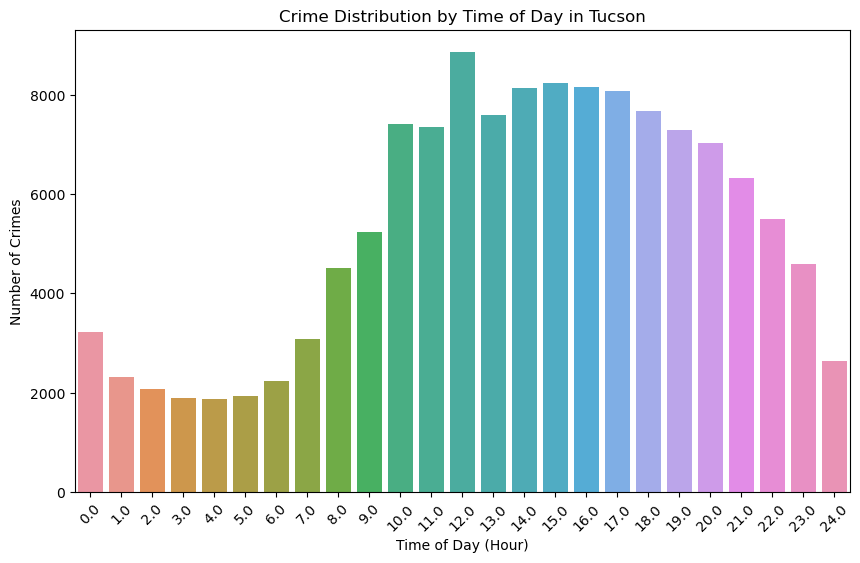

In [6]:
tucson_data['Hour'] = tucson_data['TimeOccur'].apply(lambda x: int(x[:2]) if x.strip() and x.isdigit() else None)

# Optionally, filter out rows where the hour could not be determined
tucson_data = tucson_data.dropna(subset=['Hour'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=tucson_data, order=sorted(tucson_data['Hour'].unique()))
plt.title('Crime Distribution by Time of Day in Tucson')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

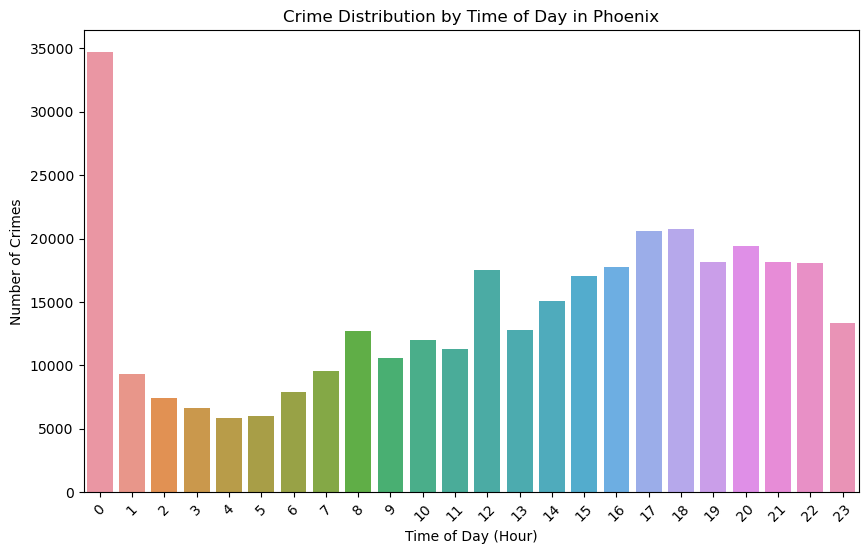

In [7]:
phoenix_data['DateTime'] = pd.to_datetime(phoenix_data['OCCURRED ON'], format='%m/%d/%Y %H:%M')

# Extract the hour from the datetime
phoenix_data['Hour'] = phoenix_data['DateTime'].dt.hour

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=phoenix_data, order=sorted(phoenix_data['Hour'].unique()))
plt.title('Crime Distribution by Time of Day in Phoenix')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

## Interactive visualization

In [8]:
# Interactive visualization example using Plotly (if applicable)
import plotly.express as px

# Convert Period to string format
tucson_data['Month'] = tucson_data['Month'].astype(str)

# Create the scatter plot
fig = px.scatter(tucson_data, x='Month', y='Offense', color='Division')
fig.show()

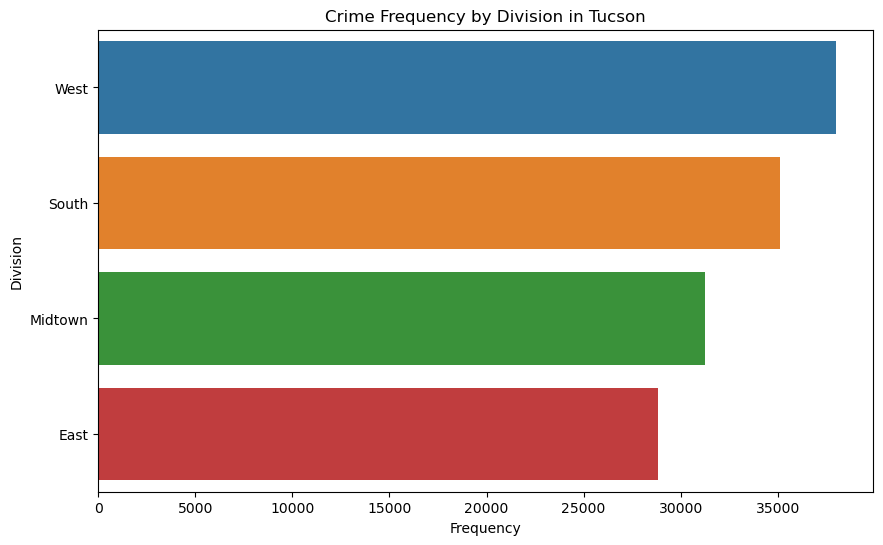

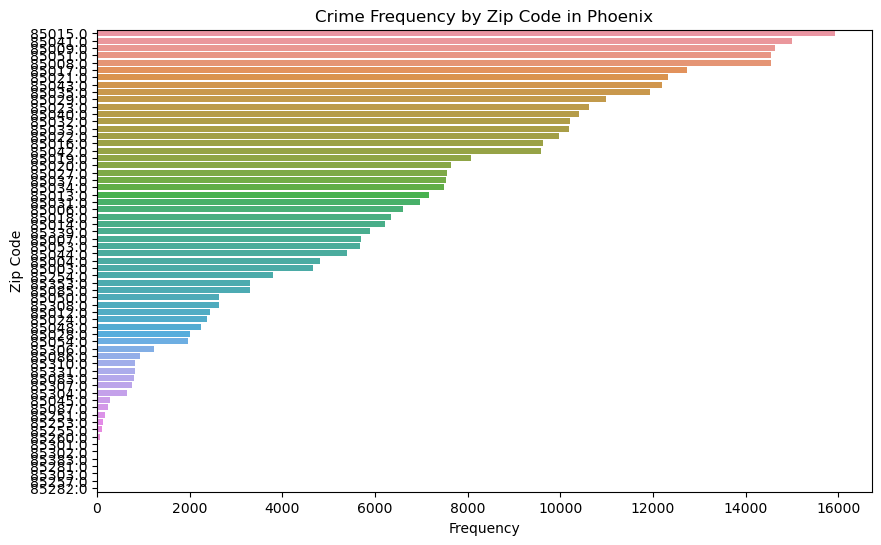

In [9]:
# Tucson - Crimes by Division
plt.figure(figsize=(10, 6))
sns.countplot(y='Division', data=tucson_data, order=tucson_data['Division'].value_counts().index)
plt.title('Crime Frequency by Division in Tucson')
plt.xlabel('Frequency')
plt.ylabel('Division')
plt.show()

# Phoenix - Crimes by Zip Code
plt.figure(figsize=(10, 6))
sns.countplot(y='ZIP', data=phoenix_data, order=phoenix_data['ZIP'].value_counts().index)
plt.title('Crime Frequency by Zip Code in Phoenix')
plt.xlabel('Frequency')
plt.ylabel('Zip Code')
plt.show()

## Machine Learning Modeling (Classification)

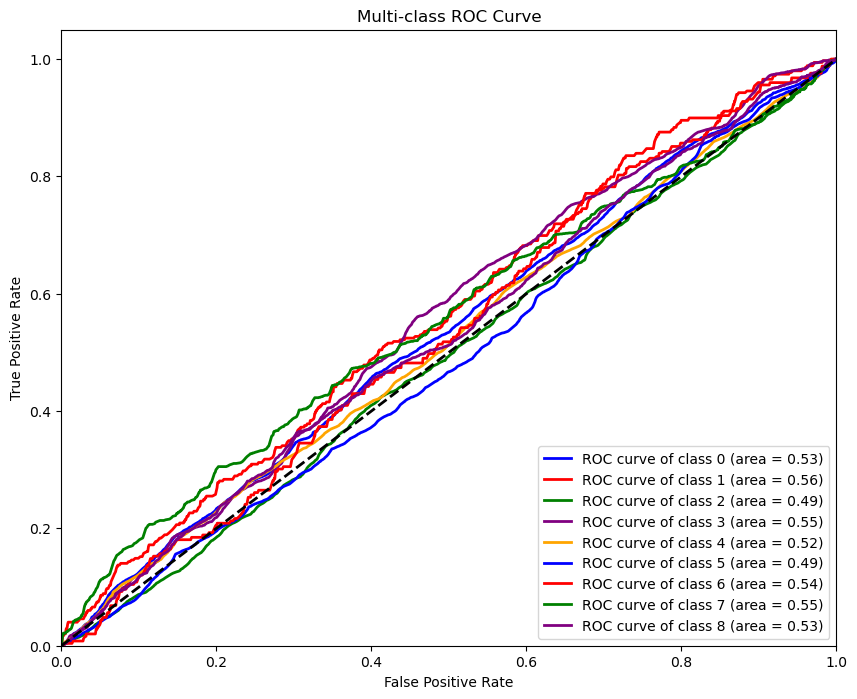

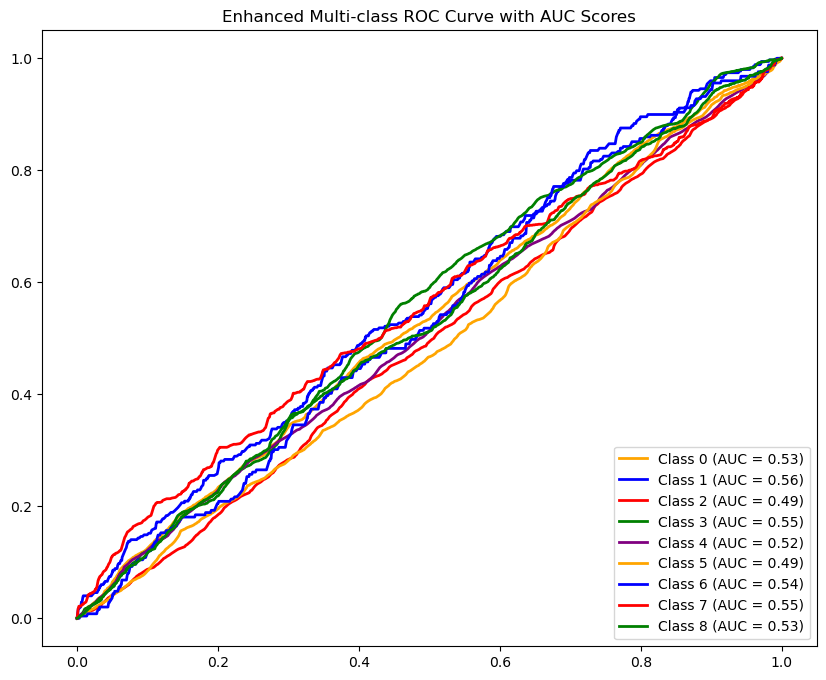

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from itertools import cycle


X = phoenix_data[['ZIP', 'Hour']]  # You can add more features here
y = phoenix_data['UCR CRIME CATEGORY']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Binarize the target labels
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_bin, test_size=0.3, random_state=42)

# Create and fit a OneVsRestClassifier using Logistic Regression
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train, y_train)

# Predict probabilities
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Enhance ROC curve plotting
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.title('Enhanced Multi-class ROC Curve with AUC Scores')
plt.legend(loc="lower right")
plt.show()

## Training & Predicting Models

In [11]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Adjust models to be less computationally intensive for testing purposes
models = {
    'RandomForest': OneVsRestClassifier(RandomForestClassifier(n_estimators=50, max_depth=10)),
    'SVM': OneVsRestClassifier(SVC(kernel='linear', probability=True)),
    'KNN': OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
}

# Assume X_train, y_train, X_test, y_test are defined and preprocessed correctly
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Predicting with {name}...")
    y_pred = model.predict(X_test)
    # Ensure y_test is in the correct binary form for F1 calculation
    if len(y_test.shape) == 1 or y_test.shape[1] == 1:
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
    else:
        y_test_binarized = y_test
    print(f'{name} F1 Score: {f1_score(y_test_binarized, y_pred, average="macro"):.2f}')

Training RandomForest...
Predicting with RandomForest...
RandomForest F1 Score: 0.07
Training SVM...


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Ensure TimeOccur is a string, strip any leading/trailing spaces
tucson_data['TimeOccur'] = tucson_data['TimeOccur'].astype(str).str.strip()

# Replace empty strings with a default value, such as '0000' (midnight)
tucson_data['TimeOccur'].replace('', '0000', inplace=True)

# Extract the hour part from TimeOccur and convert to integer
tucson_data['HourOccur'] = tucson_data['TimeOccur'].str[:2].astype(int)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Month', 'Day', 'Division', 'UCRDescription', 'CallSource']

for col in categorical_cols:
    tucson_data[col] = label_encoder.fit_transform(tucson_data[col].astype(str))

# Prepare features and target
X = tucson_data.drop(['IncidentID', 'DateOccurred', 'OffenseDescription', 'ESRI_OID', 'UCR', 'TimeOccur'], axis=1)
y = tucson_data['OffenseDescription']

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)  # Numeric columns
X.fillna('Unknown', inplace=True)  # Categorical columns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train RandomForest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Output the classification report
print(classification_report(y_test, y_pred))

c:\Users\dwijravikumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                                                         precision    recall  f1-score   support

            Aggravated Assault - Domestic Violence (DV)       1.00      1.00      1.00       875
                          Aggravated Assault - Drive-By       1.00      0.97      0.99       104
                             Aggravated Assault - Other       1.00      1.00      1.00      1571
Aggravated Assault - Peace Officer (Non-Serious Injury)       0.97      1.00      0.98       149
    Aggravated Assault - Peace Officer (Serious Injury)       0.00      0.00      0.00         5
                             Arson - Business Structure       0.80      0.80      0.80        30
                                          Arson - Other       0.99      1.00      1.00       129
                                Arson - Other Structure       0.91      0.67      0.77        15
                          Arson - Residential Structure       0.86      0.90      0.88        40
                             

c:\Users\dwijravikumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dwijravikumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Example feature set and labels
X = pd.get_dummies(tucson_data[['Ward', 'Hour', 'Month']])  # Add relevant features
y = tucson_data['UCRDescription'].astype('category').cat.codes  # Convert categories to codes if necessary

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Report:\n", classification_report(y_test, rf_predictions))

# Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)
print("Gradient Boosting Machine Classifier Report:\n", classification_report(y_test, gbm_predictions))


Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.02      0.00      0.00       574
           2       0.08      0.01      0.02      1445
           3       0.15      0.03      0.05      2704
           4       0.17      0.04      0.06      3524
           5       0.73      0.96      0.83     28531
           6       0.18      0.04      0.06      2844
           7       0.04      0.00      0.01       262

    accuracy                           0.70     39957
   macro avg       0.17      0.14      0.13     39957
weighted avg       0.56      0.70      0.61     39957

Gradient Boosting Machine Classifier Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.00      0.00      0.00       574
           2       0.00      0.00      0.00      1445
           3       0.00      0.00      0.00      270

c:\Users\dwijravikumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dwijravikumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dwijravikumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Machine Learning Modeling (Clustering)

c:\Users\dwijravikumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



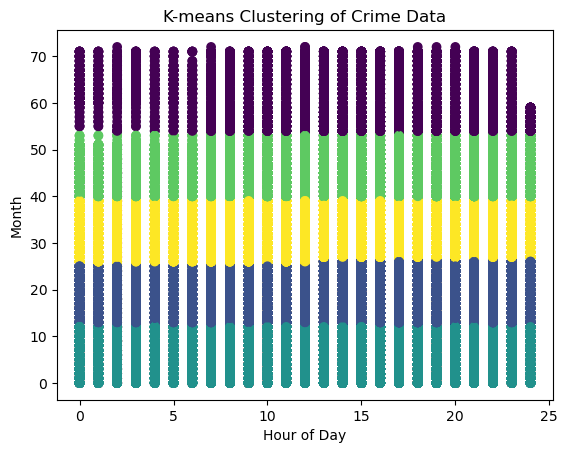

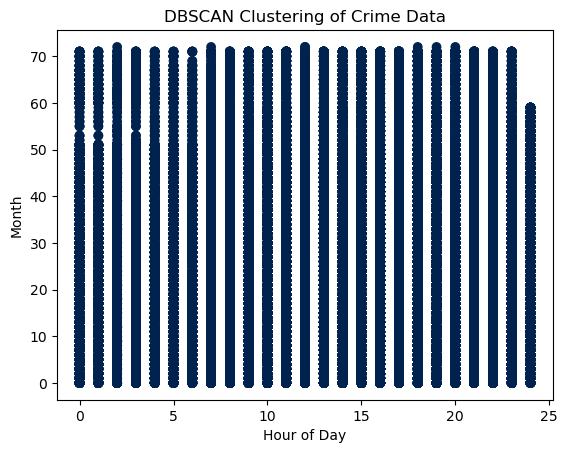

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Assuming 'Hour' and 'Month' are correctly prepared as numeric columns
X_cluster = tucson_data[['Hour', 'Month']].dropna()

# K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)
plt.scatter(X_cluster['Hour'], X_cluster['Month'], c=kmeans_labels, cmap='viridis')
plt.title("K-means Clustering of Crime Data")
plt.xlabel("Hour of Day")
plt.ylabel("Month")
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=5)  # Note: Adjust 'eps' if necessary, depending on your data scale
dbscan_labels = dbscan.fit_predict(X_cluster)
plt.scatter(X_cluster['Hour'], X_cluster['Month'], c=dbscan_labels, cmap='cividis')
plt.title("DBSCAN Clustering of Crime Data")
plt.xlabel("Hour of Day")
plt.ylabel("Month")
plt.show()